In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/musicfeatures/data.csv
/kaggle/input/musicfeatures/data_2genre.csv
/kaggle/input/musicfeatures2/data (1).csv
/kaggle/input/musicfeatures2/data_2genre.csv


Im going to combine both datasets into one to make this whole process easier
Then I will check for duplicates, missing values, or data integrity issues.
Then I wil lmake sure the combined data has all expected columns and no NaNs.

In [2]:
## Loading the Dataset
data = pd.read_csv('/kaggle/input/musicfeatures2/data (1).csv')

print(data.shape)
print(data.head())
print(data.info())

data_1 = pd.read_csv('/kaggle/input/musicfeatures2/data (1).csv')
data_2 = pd.read_csv('/kaggle/input/musicfeatures2/data_2genre.csv')

data = pd.concat([data_1, data_2])

(1000, 30)
         filename       tempo  beats  chroma_stft      rmse  \
0  blues.00081.au  103.359375     50     0.380260  0.248262   
1  blues.00022.au   95.703125     44     0.306451  0.113475   
2  blues.00031.au  151.999081     75     0.253487  0.151571   
3  blues.00012.au  184.570312     91     0.269320  0.119072   
4  blues.00056.au  161.499023     74     0.391059  0.137728   

   spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0        2116.942959         1956.611056  4196.107960            0.127272   
1        1156.070496         1497.668176  2170.053545            0.058613   
2        1331.073970         1973.643437  2900.174130            0.042967   
3        1361.045467         1567.804596  2739.625101            0.069124   
4        1811.076084         2052.332563  3927.809582            0.075480   

        mfcc1  ...     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
0  -26.929785  ...  14.336612 -13.821769  7.562789 -6.181372  0.330165   

In the datasets there were some weird labels with 1 and 2, so I replace them with their respective genres

In [3]:
data['label'].value_counts()
data['label'] = data['label'].replace(to_replace={1: 'pop', 2: 'classical'})
data['label'].value_counts()


label
classical    200
pop          200
blues        100
country      100
disco        100
hiphop       100
jazz         100
metal        100
reggae       100
rock         100
Name: count, dtype: int64

Now checking for missing values

In [4]:
data.isna().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

Choosing random features to see what works. Ill have two sets of the features to see which works better. 

In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

features = ["tempo", "beats", "spectral_centroid", "spectral_bandwidth", "rolloff", "zero_crossing_rate"]
features2 = ["tempo", "beats", "rolloff", "spectral_bandwidth"]  # Alternate feature set

X = data[features]
X2 = data[features2]
y = data['label']  

# Split into training and validation datasets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X2, val_X2, train_y2, val_y2 = train_test_split(X2, y, random_state=1)

Im going to choose a random forest over a decision tree, I suspect it will work better for this large data set

In [6]:
# Define the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=1)

# Train on the first set of features
rf_model.fit(train_X, train_y)

# Predict and evaluate
rf_val_predictions = rf_model.predict(val_X)
accuracy = accuracy_score(val_y, rf_val_predictions)
print("Validation Accuracy for Random Forest Model (Feature Set 1):", accuracy)
print("\nClassification Report (Feature Set 1):\n", classification_report(val_y, rf_val_predictions))

# Define another RandomForestClassifier for the second feature set
rf_model_selected_features = RandomForestClassifier(random_state=1)

# Train on the second set of features
rf_model_selected_features.fit(train_X2, train_y2)

# Predict and evaluate
rf_model_selected_features_val_predictions = rf_model_selected_features.predict(val_X2)
accuracy2 = accuracy_score(val_y2, rf_model_selected_features_val_predictions)
print("Validation Accuracy for Random Forest Model (Feature Set 2):", accuracy2)
print("\nClassification Report (Feature Set 2):\n", classification_report(val_y2, rf_model_selected_features_val_predictions))

Validation Accuracy for Random Forest Model (Feature Set 1): 0.4766666666666667

Classification Report (Feature Set 1):
               precision    recall  f1-score   support

       blues       0.25      0.20      0.22        25
   classical       0.67      0.91      0.77        44
     country       0.28      0.26      0.27        27
       disco       0.35      0.35      0.35        26
      hiphop       0.32      0.30      0.31        20
        jazz       0.42      0.30      0.35        27
       metal       0.45      0.56      0.50        25
         pop       0.72      0.87      0.79        47
      reggae       0.53      0.30      0.38        33
        rock       0.12      0.12      0.12        26

    accuracy                           0.48       300
   macro avg       0.41      0.42      0.41       300
weighted avg       0.45      0.48      0.46       300

Validation Accuracy for Random Forest Model (Feature Set 2): 0.44666666666666666

Classification Report (Feature Set 2):

First set of features worked a little better. 
Pop and Classical have higher precision and recall, likely because their features are more distinguishable.
The model is better at finding the Classical and Pop music, while Blues, Rock, and Jazz are harder to distinguish. 
Maybe some overlapping or indistinct features for these genres.

Lets try to find the most optimal set of features

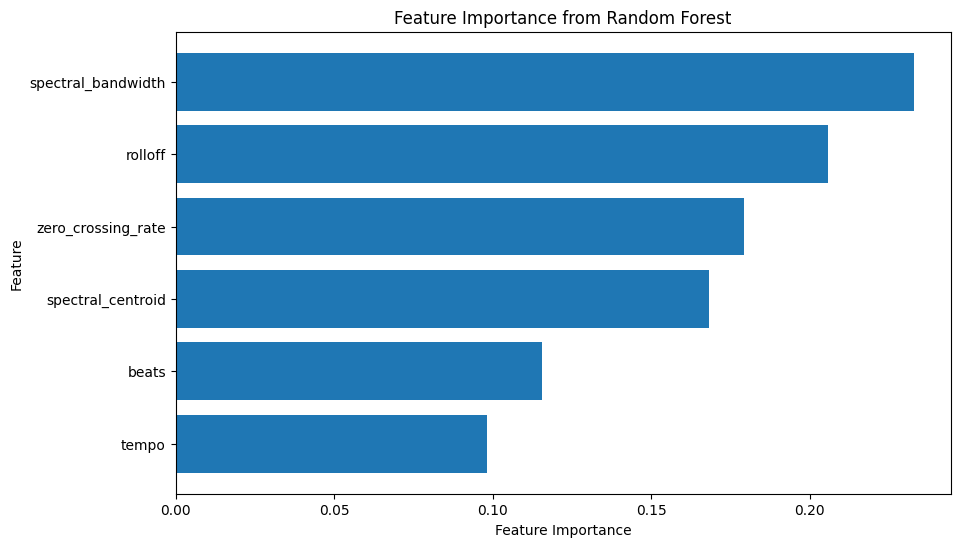

              Feature  Importance
3  spectral_bandwidth    0.232862
4             rolloff    0.205836
5  zero_crossing_rate    0.179365
2   spectral_centroid    0.168205
1               beats    0.115560
0               tempo    0.098172


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# training a random forest on every feature
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(train_X, train_y)

# finding which are most important
importances = rf_model.feature_importances_
feature_names = train_X.columns

# put them in a data frame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance_df)

The Random Forest says that these 6 features are most important. We can just isolate these features in a seperate random forest to see how that performs

In [8]:
from sklearn.metrics import accuracy_score, classification_report

top_features = ["spectral_bandwidth", "rolloff", "zero_crossing_rate", "spectral_centroid", "beats", "tempo"]
train_X_top = train_X[top_features]
val_X_top = val_X[top_features]

# since we are going to be using XGBoost at the end, we can just map the string values now
label_mapping = {
    'blues': 0, 'classical': 1, 'country': 2, 'disco': 3,
    'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7,
    'reggae': 8, 'rock': 9
}
train_y_mapped = train_y.map(label_mapping)
val_y_mapped = val_y.map(label_mapping)

In [9]:
rf_model = RandomForestClassifier(
    n_estimators=100,    
    max_depth=10,        
    random_state=1
)
rf_model.fit(train_X_top, train_y_mapped)

# Predict on the validation set
rf_val_predictions = rf_model.predict(val_X_top)

# Evaluate the Random Forest model
rf_val_accuracy = accuracy_score(val_y_mapped, rf_val_predictions)
print("Validation Accuracy for Random Forest Model:", rf_val_accuracy)

print("\nClassification Report (Random Forest):")
print(classification_report(val_y_mapped, rf_val_predictions, zero_division=0))

print("Confusion Matrix:")
print(confusion_matrix(val_y_mapped, rf_val_predictions))




Validation Accuracy for Random Forest Model: 0.49666666666666665

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.32      0.24      0.27        25
           1       0.64      0.89      0.74        44
           2       0.35      0.26      0.30        27
           3       0.34      0.42      0.38        26
           4       0.40      0.40      0.40        20
           5       0.43      0.22      0.29        27
           6       0.50      0.52      0.51        25
           7       0.70      0.94      0.80        47
           8       0.45      0.27      0.34        33
           9       0.24      0.23      0.24        26

    accuracy                           0.50       300
   macro avg       0.44      0.44      0.43       300
weighted avg       0.47      0.50      0.47       300

Confusion Matrix:
[[ 6  7  5  2  1  1  1  0  1  1]
 [ 4 39  0  0  0  0  0  0  0  1]
 [ 2  3  7  3  2  2  1  3  1  3]
 [ 1  0  0 11  1  0

Since none of these models performed well, I suspect that the features I chose were not optimal. Im going to try to represent more features, and perhaps make a deeper tree. 

Adding more features

In [10]:
from sklearn.preprocessing import LabelEncoder

y_encoded = LabelEncoder().fit_transform(data['label'])

# Selected features based on previous analysis (including MFCCs)
expanded_features = [
    "tempo", "beats", "spectral_centroid", "spectral_bandwidth", 
    "rolloff", "zero_crossing_rate", "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5"
]
X_expanded = data[expanded_features]

In [11]:
# splitting dataset
train_X, val_X, train_y, val_y = train_test_split(
    X_expanded, 
    y_encoded, 
    test_size=0.3, 
    random_state=1
)

print("Training set size:", train_X.shape, train_y.shape)
print("Validation set size:", val_X.shape, val_y.shape)

Training set size: (840, 11) (840,)
Validation set size: (360, 11) (360,)


I am going to train a random forest with different n_estimators and maxdepth to increase the complexity

In [12]:
from sklearn.metrics import classification_report

rf_model_optimized = RandomForestClassifier(
    
    n_estimators=200,       
    # since our previous model was overfitting quite a bit, im going to put some constraints on the random forest
    max_depth=15,           # Deeper trees for more complex patterns
    min_samples_split=5,    # Minimum samples required to split an internal node
    min_samples_leaf=2,     # Minimum samples required in a leaf node
    max_features='sqrt',    
    random_state=1         
)

# Train the model
rf_model_optimized.fit(train_X, train_y)

# Evaluate on the training set
rf_train_accuracy = rf_model_optimized.score(train_X, train_y)
print(f"Optimized Random Forest Training Accuracy: {rf_train_accuracy}")

Optimized Random Forest Training Accuracy: 0.9773809523809524


In [13]:
# now evaluating, add a confusion matrix and classification report
rf_val_accuracy = rf_model_optimized.score(val_X, val_y)
print(f"Optimized Random Forest Validation Accuracy: {rf_val_accuracy}")

# Make predictions on the validation set
rf_val_predictions = rf_model_optimized.predict(val_X)

# Classification report gives precision, recall, and F1-score for each class
print("\nOptimized Random Forest Classification Report:")
print(classification_report(val_y, rf_val_predictions))

# Confusion matrix helps visualize misclassifications across classes
print("Confusion Matrix:")
print(confusion_matrix(val_y, rf_val_predictions))

Optimized Random Forest Validation Accuracy: 0.6138888888888889

Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.52      0.56        33
           1       0.78      1.00      0.88        54
           2       0.30      0.28      0.29        29
           3       0.52      0.53      0.52        32
           4       0.58      0.39      0.47        28
           5       0.70      0.48      0.57        29
           6       0.71      0.86      0.77        28
           7       0.65      0.96      0.78        54
           8       0.58      0.38      0.46        37
           9       0.38      0.28      0.32        36

    accuracy                           0.61       360
   macro avg       0.58      0.57      0.56       360
weighted avg       0.59      0.61      0.59       360

Confusion Matrix:
[[17  5  4  2  1  0  1  0  2  1]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 1  2  8  2  2  3  1  3  3  4]
 [ 1  0  0 1

It looks like increasing the complexity of the model has just caused it to overfit. We can try to fix it by limiting the n_estimators, depth, etc. But since we found the most important features based on the original model, we should do it again for the parameters of our new one. 

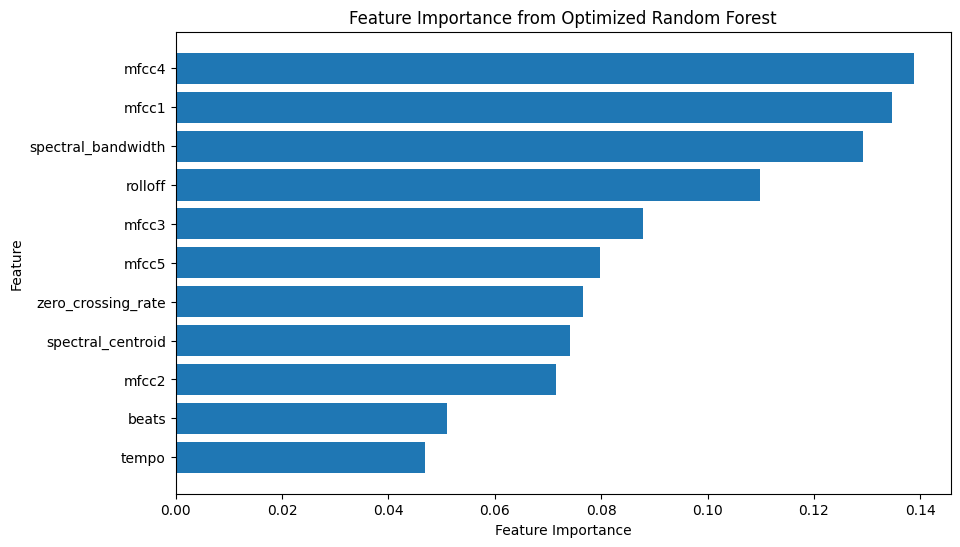

,Feature,Importance
9,mfcc4,0.138754
6,mfcc1,0.134634
3,spectral_bandwidth,0.129248
4,rolloff,0.109799
8,mfcc3,0.087897
10,mfcc5,0.079692
5,zero_crossing_rate,0.076598
2,spectral_centroid,0.074044
7,mfcc2,0.071556
1,beats,0.050921


In [14]:
# finding out and visualizing which features are important in the random forest
importances = rf_model_optimized.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': expanded_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Optimized Random Forest')
plt.gca().invert_yaxis()
plt.show()

display(feature_importance_df)

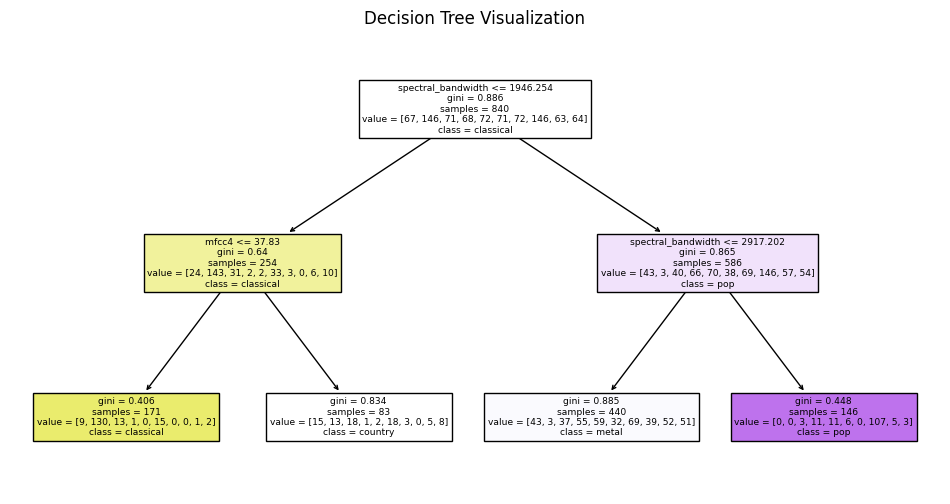

In [15]:
# visualizing a decision tree in our random forest to see if there is a corelation in most important features
from sklearn import tree
dt_model_reduced = tree.DecisionTreeClassifier(max_depth=2, random_state=1)
dt_model_reduced.fit(train_X, train_y)

# Visualize with corrected feature names
plt.figure(figsize=(12, 6))
tree.plot_tree(
    dt_model_reduced, 
    feature_names=train_X.columns.tolist(),
    class_names=LabelEncoder().fit(data['label']).classes_, 
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()

If you look closely, the spectral bandwidth and MCCFC features we the first to be split. Even though this is a random forest, this correlation still matches with the graph we made earlier, and we can safely assume that these features are quite important. 

This time the accuracy was much better. The expanded feature set likely included more relevant information for classification, allowing the model to make better decisions.

We also increased the depth of the Decision Tree which may have allowed it to capture more complex patterns in the data.
The Random Forest performed well due to its ability to combine the strengths of multiple trees and avoid overfitting.

Classes 1 and 7 are predicted very well, while others are poor. This is the same issue we ran into earlier, and it likely means that the model is latching onto very distinctive features that identify those "easy" classes. For harder classes, the model cant find the smilarly generalizable patterns. I suspect that the model continues to over fit because its too complex and not regularized enough. In other words, the random forest is allowed to grow trees that capture alot of detail, which lets the model memorize the training samples rather than learn the underlying patterns. 

In [16]:
# trying a random forest that is more simple
rf_more_regularized = RandomForestClassifier(
    n_estimators=100,        
    max_depth=8,             
    min_samples_split=5,     
    min_samples_leaf=3,   
    random_state=1
)

# Train the model using the same train_X, train_y defined earlier
rf_more_regularized.fit(train_X, train_y)

train_acc = rf_more_regularized.score(train_X, train_y)
val_acc = rf_more_regularized.score(val_X, val_y)

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

val_preds = rf_more_regularized.predict(val_X)

print("\nClassification Report:")
print(classification_report(val_y, val_preds))

print("Confusion Matrix:")
print(confusion_matrix(val_y, val_preds))


Training Accuracy: 0.8476190476190476
Validation Accuracy: 0.5722222222222222

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.48      0.55        33
           1       0.78      0.91      0.84        54
           2       0.25      0.21      0.23        29
           3       0.44      0.50      0.47        32
           4       0.45      0.32      0.38        28
           5       0.56      0.48      0.52        29
           6       0.65      0.86      0.74        28
           7       0.62      0.93      0.74        54
           8       0.50      0.32      0.39        37
           9       0.40      0.28      0.33        36

    accuracy                           0.57       360
   macro avg       0.53      0.53      0.52       360
weighted avg       0.55      0.57      0.55       360

Confusion Matrix:
[[16  5  3  1  2  3  0  0  1  2]
 [ 2 49  1  1  0  0  0  0  1  0]
 [ 1  2  6  2  4  3  2  4  2  3]
 [ 0  0  1 16  0  0  3

So the model is less overfitted (98% to 85%) so it no longer memorizes the training data as heavily. However the validation data is still bad. So reducing the model complexity isnt enough to improve its ability to do unseen data. 

What we did notice though was that the MFCC features helped in distinguishing between classes, so we will include more to see if that helps. We will retrain a random forest on this expanded feature set and use the more simple parameters. 

In [17]:
# Expanded feature set including more MFCCs
new_features = [
    "tempo", "beats", "spectral_centroid", "spectral_bandwidth", 
    "rolloff", "zero_crossing_rate",
    "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5",
    "mfcc6", "mfcc7", "mfcc8", "mfcc9", "mfcc10"
]

X_new = data[new_features]

# Train-test split
train_X_n, val_X_n, train_y_n, val_y_n = train_test_split(X_new, y_encoded, test_size=0.3, random_state=1)

# More simple Random Forest with max_features='sqrt'
rf_with_max_features = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_leaf=3,
    min_samples_split=10,
    max_features='sqrt',
    random_state=1,
)

rf_with_max_features.fit(train_X_n, train_y_n)

train_acc = rf_with_max_features.score(train_X_n, train_y_n)
val_acc = rf_with_max_features.score(val_X_n, val_y_n)

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

val_preds_n = rf_with_max_features.predict(val_X_n)

print("\nClassification Report:")
print(classification_report(val_y_n, val_preds_n))

print("Confusion Matrix:")
print(confusion_matrix(val_y_n, val_preds_n))


Training Accuracy: 0.8761904761904762
Validation Accuracy: 0.6

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.42      0.50        33
           1       0.85      0.96      0.90        54
           2       0.41      0.31      0.35        29
           3       0.44      0.50      0.47        32
           4       0.47      0.32      0.38        28
           5       0.48      0.48      0.48        29
           6       0.65      0.86      0.74        28
           7       0.60      0.94      0.73        54
           8       0.65      0.46      0.54        37
           9       0.45      0.28      0.34        36

    accuracy                           0.60       360
   macro avg       0.56      0.55      0.55       360
weighted avg       0.58      0.60      0.58       360

Confusion Matrix:
[[14  2  4  1  0  9  1  0  0  2]
 [ 0 52  0  0  0  1  0  1  0  0]
 [ 0  1  9  3  3  3  1  4  0  5]
 [ 1  0  0 16  1  1  3  9  0  1]
 [ 0

We were able to reduce overfitting, with validation accuracy around 60% and the training accuracy no longer near perfect at 87.6%. 

I am satisfied with this progress, so we can retry the XGBoost and see if its better

In [18]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

params = {
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 200,
    'subsample': 0.8
}

# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X_new, y_encoded, test_size=0.3, random_state=1)

# Create the pipeline with scaling and theXGBoost model
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(
        use_label_encoder=False, 
        eval_metric='mlogloss',
        random_state=1,
        **params
    ))
])

In [19]:
# Train the final model on the training data
final_pipeline.fit(train_X, train_y)

# Evaluate on the validation set
val_preds = final_pipeline.predict(val_X)
val_acc = final_pipeline.score(val_X, val_y)

print("Final Model Validation Accuracy:", val_acc)
print("\nClassification Report:")
print(classification_report(val_y, val_preds))
print("Confusion Matrix:")
print(confusion_matrix(val_y, val_preds))

Final Model Validation Accuracy: 0.6777777777777778

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        33
           1       0.95      1.00      0.97        54
           2       0.53      0.59      0.56        29
           3       0.56      0.59      0.58        32
           4       0.53      0.36      0.43        28
           5       0.50      0.52      0.51        29
           6       0.70      0.82      0.75        28
           7       0.76      0.93      0.83        54
           8       0.68      0.51      0.58        37
           9       0.54      0.42      0.47        36

    accuracy                           0.68       360
   macro avg       0.64      0.64      0.63       360
weighted avg       0.67      0.68      0.67       360

Confusion Matrix:
[[22  0  5  1  0  4  0  0  0  1]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  1 17  2  0  6  1  1  1  0]
 [ 2  0  2 19  0  0  2  5  1  1]
 [ 0  1  1  4 1

The XGBoost again did better. Since it builds trees sequentially instead of independently and averaging them after like the random forest, each tree can focus on errors made by the previous ones. Since we can control how complex the model can become with learning rate, n_estimators, etc we can cut down on the over fitting we kept experiencing with the random forest. If certain audio features and MFCCs only show their value when combined in complex ways, XGBoost is better to uncover these relationships